## 사용자의 답변과 감정 분석 결과를 
## Gemini 모델에 전달하여 상황에 맞는 추가 질문을 생성

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))  # 현재 디렉터리의 상위 경로 추가
#print(sys.path)

In [2]:
from config.api_keys import gemini_key
import google.generativeai as genai

c:\Users\user\miniconda3\envs\DL311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Gemini API 설정
genai.configure(api_key=gemini_key)

# Gemini 모델 선택
model = genai.GenerativeModel('gemini-2.0-flash')

def generate_question(user_response, emotion, conversation):
    prompt = f"""
    사용자의 답변: "{user_response}"
    사용자의 감정: "{emotion}"
    이전 대화 내용: "{conversation}"

    위 정보를 바탕으로, 친근하고 공감하는 어조로 사용자의 상황과 감정을 고려하여 구체적이고,
    이전 대화 내용의 핵심 포인트를 반영하여 답변하기 쉬운 질문을 생성하세요.
    """
    response = model.generate_content(prompt)
    return response.text

In [8]:
user_response = "오늘 너무 힘들었어요."
emotion = "슬픔"
conversation = "사용자: 오늘 기분이 어떠세요? \nLLM: 오늘 너무 힘들었어요."

follow_up_question = generate_question(user_response, emotion, conversation)
print(follow_up_question)

오늘 하루가 많이 힘드셨군요. 😔 무슨 일 때문에 그렇게 힘드셨는지 여쭤봐도 될까요? 혹시 이야기하기 힘드시면, 그냥 털어놓고 싶은 마음만이라도 편하게 말씀해주세요. 제가 옆에서 묵묵히 들어드릴게요.



In [7]:
user_response= "오늘 승진 소식을 들었어요."
emotion= "기쁨"
conversation= "사용자: 오늘 어떤 일이 있으셨어요? LLM: 오늘 승진 소식을 들었어요."

follow_up_question1 = generate_question(user_response, emotion, conversation)
print(follow_up_question1)

와, 승진이라니 정말 축하드려요! 오늘 정말 기쁘시겠네요! 🥳 어떤 분야에서 승진하신 거예요? 혹시 예상하고 계셨던 결과였는지, 아니면 깜짝 놀라셨는지 궁금해요! 😊



In [9]:
user_response= "친구와 큰 다툼이 있었어요."
emotion= "분노"
conversation = "사용자: 오늘 무슨 일이 있었나요? LLM: 친구와 큰 다툼이 있었어요."

follow_up_question2 = generate_question(user_response, emotion, conversation)
print(follow_up_question2)

아이고, 친구분과 크게 다투셨다니 얼마나 속상하실까요. 게다가 분노까지 느끼신다니 마음이 많이 힘드실 것 같아요. 오늘 있었던 일 때문에 많이 힘드실 텐데, 혹시 어떤 일 때문에 그렇게 크게 다투게 되셨는지 조금만 더 이야기해 주실 수 있으세요? 괜찮으시다면 제가 옆에서 들어드리면서 조금이라도 위로가 되어 드리고 싶어요.



In [10]:
user_response= "최근 건강이 많이 걱정돼요."
emotion= "걱정"
conversation ="사용자: 요즘 건강은 어떠세요? LLM: 최근 건강이 많이 걱정돼요."

follow_up_question3 = generate_question(user_response, emotion, conversation)
print(follow_up_question3)

아이고, 건강이 많이 걱정되신다니 마음이 쓰이네요. 요즘 특히 어디가 불편하신가요? 혹시 최근에 병원에 가보셨거나, 특별히 신경 쓰이는 부분이 있으신지 여쭤봐도 될까요?



In [11]:
user_response= "연애 중인데, 정말 기분이 좋네요."
emotion= "환희"
conversation = "사용자: 최근 연애는 어떠세요? LLM: 연애 중인데, 많이 좋네요."

follow_up_question4 = generate_question(user_response, emotion, conversation)
print(follow_up_question4)

와, 연애 중이시라니 정말 축하드려요! 😊 저번에 말씀해주신 것처럼 지금도 많이 좋으신가 봐요! 혹시 최근에 서로에게 특별히 더 설레거나 기분 좋았던 일이 있었나요? 아니면 서로에게 어떤 점이 가장 큰 행복을 주는지 궁금하네요! 



### 이전 대화 기록하도록 코드 수정

#### 1) 최초 프롬프트

In [ ]:
# Gemini API 설정
genai.configure(api_key=gemini_key)

# Gemini 모델 선택
model = genai.GenerativeModel('gemini-2.0-flash')

chat_history = []  # 이전 대화 내용을 저장할 리스트

def ask_gemini(user_response, emotion, max_history_length=5):
    """대화 기록을 유지하며 Gemini 모델과 대화하는 함수
    사용자 응답과 감정을 포함하여 전체 프롬프트를 구성하고,
    모델의 응답을 대화 기록에 추가
    """
    global chat_history

    # 이전 대화 내용과 새 입력(사용자 응답 및 감정)을 결합하여 전체 프롬프트 생성
    full_prompt = "\n".join(chat_history) +f"\nUser (감정: {emotion}): {user_response}\n\n" + \
                  "정보를 바탕으로, 친근하고 공감하는 어조로 사용자의 상황과 감정을 고려하여 구체적이고, " + \
                  "이전 대화 내용의 핵심 포인트를 반영하여 답변하기 쉬운 질문을 생성하세요."

    # Gemini 모델 호출하여 응답 생성
    response = model.generate_content(full_prompt)

    # 새로운 입력과 모델의 응답을 대화 기록에 추가
    chat_history.append(f"User (감정: {emotion}): {user_response}")
    chat_history.append(f"Gemini: {response.text}")

    # 대화 기록 길이 제한: 최대 max_history_length 쌍(질문/응답) 이상이면 오래된 대화 삭제
    if len(chat_history) > max_history_length * 2:
        chat_history = chat_history[-(max_history_length * 2):]

    return response.text

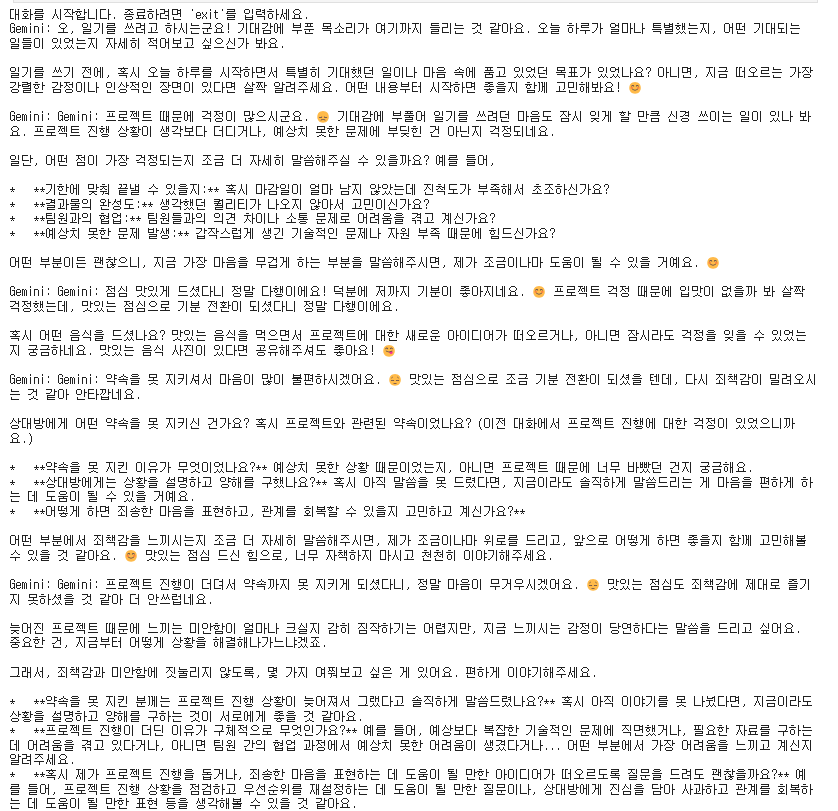

#### 2) 수정 프롬프트

In [3]:
# Gemini API 설정
genai.configure(api_key=gemini_key)

# Gemini 모델 선택
model = genai.GenerativeModel('gemini-2.0-flash')

chat_history = []  # 이전 대화 내용을 저장할 리스트

def ask_gemini(user_response, emotion, max_history_length=5):
    """대화 기록을 유지하며 Gemini 모델과 대화하는 함수
    사용자 응답과 감정을 포함하여 전체 프롬프트를 구성하고,
    모델의 응답을 대화 기록에 추가
    """
    global chat_history

    # 이전 대화 내용과 새 입력(사용자 응답 및 감정)을 결합하여 전체 프롬프트 생성
    full_prompt = "\n".join(chat_history) +f"\nUser (감정: {emotion}): {user_response}\n\n" + \
                  "정보를 바탕으로, 친근하고 공감하는 어조로 일기 작성을 돕기 위해, 사용자의 감정을 이해하고 이를 탐색할 수 있는 질문을 한 개만 생성하세요. " + \
                  "이전 대화 내용의 핵심 포인트를 반영하여 답변하기 쉬운 질문을 생성하세요."+"답변은 2~3문장으로 간결하게 유지하고, 예시는 하나만 제공하세요. "

    # Gemini 모델 호출하여 응답 생성
    response = model.generate_content(full_prompt)

    # 새로운 입력과 모델의 응답을 대화 기록에 추가
    chat_history.append(f"User (감정: {emotion}): {user_response}")
    chat_history.append(f"Gemini: {response.text}")

    # 대화 기록 길이 제한: 최대 max_history_length 쌍(질문/응답) 이상이면 오래된 대화 삭제
    if len(chat_history) > max_history_length * 2:
        chat_history = chat_history[-(max_history_length * 2):]

    return response.text

In [6]:
chat_history.clear()  # 이전 대화 내용 삭제
print("대화 기록이 초기화되었습니다.")

대화 기록이 초기화되었습니다.


In [16]:
print(ask_gemini("오늘 하루에 대한 일기를 쓰려고 해.", "기대"))
print(ask_gemini("점심에 맛있는 음식을 먹었어.", "행복"))
print(ask_gemini("오후에 약속을 못 지켜서 미안해.", "죄책감"))
print(ask_gemini("저녁에 친구와의 대화가 너무 즐거웠어.", "행복"))
print(ask_gemini("밤에 너무 피곤해, 오늘 하루가 힘들었어.", "피곤"))

print("\n전체 대화 기록:")
for chat in chat_history:
    print(chat, '\n----------------------')

오, 오늘 하루 일기를 쓰시는군요! 어떤 하루였을지 너무 궁금해져요. 😉 오늘 하루를 돌아보면서 가장 먼저 떠오르는 감정이나 장면이 있으신가요? 아니면, 오늘 하루를 특별하게 만들었던 예상치 못한 일이 있었을까요? 일기 쓰실 때 편하게 떠오르는 대로 말씀해주시면, 더 구체적인 질문으로 이야기를 풀어갈 수 있도록 도와드릴게요!

와! 맛있는 점심을 드셨다니 정말 기분 좋으시겠어요! 😊 어떤 음식을 드셨는지 여쭤봐도 될까요? 정말 맛있었나 봐요! 혹시 그 음식을 먹으면서 어떤 점이 가장 행복하게 느껴졌는지, 아니면 누구와 함께 드셨는지도 궁금해요! 맛있는 음식 덕분에 오늘 하루가 더 특별해진 것 같네요! ☀️

음, 약속을 못 지키셔서 마음이 좀 불편하시겠어요. 😔 맛있는 점심을 드셨던 행복한 기분과는 조금 다른 감정이 드셨을 텐데, 혹시 그 약속이 얼마나 중요한 약속이었나요? 그리고 누구와의 약속이었는지, 어떤 이유로 못 지키게 되셨는지 여쭤봐도 괜찮을까요? 죄책감 때문에 힘드실 텐데, 혹시 상대방에게 솔직하게 이야기하고 사과하셨는지, 아니면 어떻게 해결하려고 노력하고 계신지도 궁금하네요. 너무 자책하지 마시고, 괜찮으시다면 조금 더 자세히 이야기해주시면 마음이 좀 편해지실 수도 있을 거예요.

와, 저녁에는 친구분과 즐거운 시간을 보내셨다니 정말 다행이에요! 😊 오늘 하루, 맛있는 점심과 즐거운 저녁 대화 덕분에 행복한 기억이 가득하셨겠네요! 👍 혹시 친구분과는 어떤 이야기를 나누셨나요? 즐거운 대화 덕분에 약속을 못 지킨 죄책감이 조금은 덜어졌을까요? 아니면, 친구분과의 대화에서 어떤 점이 특히 즐겁고 기억에 남았는지 궁금해요! 맛있는 점심, 죄책감, 그리고 즐거운 저녁 대화까지, 오늘 하루 감정의 롤러코스터를 타신 것 같은데, 마지막 대화가 행복하게 마무리되어서 정말 다행입니다! 🌈

네, 오늘 하루 일기 마무리하시는군요! 맛있는 점심, 약속 불이행으로 인한 죄책감, 그리고 즐거운 저녁 대화까지, 다채로운 감정들이 오갔던 하루였네요. 마지막에 피곤함을 느끼

### 인터랙티브 대화

In [7]:
# 인터랙티브 대화 시뮬레이션
print("대화를 시작합니다. 종료하려면 'exit'를 입력하세요.")

# 첫 질문: Gemini가 초기 질문을 던지거나 사용자가 첫 답변을 입력하도록 할 수 있음. 
user_response = input("User: ")
emotion = input("User 감정 (예: 기쁨, 슬픔, 화남 등): ")
follow_up_question = ask_gemini(user_response, emotion)
print("Gemini:", follow_up_question)

# 반복 대화: 사용자가 답변하고, 감정 분석 결과(여기서는 수동 입력)를 받아서 Gemini가 추가 질문. 
while True:
    user_response = input("User: ")
    if user_response.lower() == "exit":
        break
    emotion = input("User 감정 (예: 기쁨, 슬픔, 화남 등): ")
    follow_up_question = ask_gemini(user_response, emotion)
    print(follow_up_question)

    # 현재까지의 전체 대화 내역을 출력하여 사용자가 입력한 내용도 확인 가능.
    print("\n 대화 기록:")
    for chat in chat_history:
        print(chat)
    print("\n----------------------")



대화를 시작합니다. 종료하려면 'exit'를 입력하세요.
Gemini: 새로운 일기를 시작하게 된 이유가 궁금하네요! 혹시 지금 마음속에 가장 먼저 적고 싶은 이야기가 있다면, 어떤 종류의 이야기일까요? 예를 들어, "오늘 날씨가 너무 좋아서 공원에 갔던 이야기"처럼요.

감정 관리를 위해 일기를 쓰기로 결심하신 이유가 있으신가요? 혹시 최근에 감정적으로 힘들었던 경험이 있으시다면, 일기를 통해 어떤 점을 풀어내고 싶으신지 살짝 이야기해 주실 수 있을까요? 예를 들어, '직장에서 받은 스트레스 때문에 힘들었는데, 일기를 쓰면서 차분하게 생각을 정리하고 싶다'처럼요.


 대화 기록:
User (감정: 기대): 일기를 처음써볼려구 해
Gemini: 새로운 일기를 시작하게 된 이유가 궁금하네요! 혹시 지금 마음속에 가장 먼저 적고 싶은 이야기가 있다면, 어떤 종류의 이야기일까요? 예를 들어, "오늘 날씨가 너무 좋아서 공원에 갔던 이야기"처럼요.

User (감정: 의문): 나의 감정관리를 위해 일기를 한번 써볼까 해
Gemini: 감정 관리를 위해 일기를 쓰기로 결심하신 이유가 있으신가요? 혹시 최근에 감정적으로 힘들었던 경험이 있으시다면, 일기를 통해 어떤 점을 풀어내고 싶으신지 살짝 이야기해 주실 수 있을까요? 예를 들어, '직장에서 받은 스트레스 때문에 힘들었는데, 일기를 쓰면서 차분하게 생각을 정리하고 싶다'처럼요.


----------------------
마음을 차분하게 하기 위해 일기를 쓰기로 하셨군요. 어떤 종류의 일기를 쓰면 마음이 더 편안해질 것 같나요? 예를 들어, 하루 동안 감사했던 일들을 적어보는 건 어떠세요?


 대화 기록:
User (감정: 기대): 일기를 처음써볼려구 해
Gemini: 새로운 일기를 시작하게 된 이유가 궁금하네요! 혹시 지금 마음속에 가장 먼저 적고 싶은 이야기가 있다면, 어떤 종류의 이야기일까요? 예를 들어, "오늘 날씨가 너무 좋아서 공원에 갔던 이야기"처럼요.

User (감정: 의문): 나의 감정관리를 위해

## 전체 대화 내용을 Gemini 모델에 전달하여 간결하게 요약

In [ ]:
# Gemini API 설정
genai.configure(api_key=gemini_key)

# Gemini 모델 선택
model = genai.GenerativeModel('gemini-2.0-flash')

def summarize_conversation(conversation):
    prompt = f"""
    다음 대화 내용을 요약하세요:
    "{conversation}"
    요약은 간결하고 핵심 내용을 포함해야 합니다.
    """
    response = model.generate_content(prompt)
    return response.text

In [6]:
conversation = """
사용자: 오늘 기분이 어떠세요?
LLM: 오늘 너무 힘들었어요.
사용자: 왜 힘드셨어요?
LLM: 회사에서 일이 너무 많았어요.
"""

summary = summarize_conversation(conversation)
print(summary)

LLM은 회사 일 때문에 힘든 하루를 보냈다.



### 기록 되어진 전체 대화 내용을 요약

In [ ]:
# Gemini API 설정
genai.configure(api_key=gemini_key)

# Gemini 모델 선택
model = genai.GenerativeModel('gemini-2.0-flash')

def summarize_conversation(conversation):
    prompt = f"""
    다음 대화 내용을 요약하세요:
    "{conversation}"
    요약은 간결하고 핵심 내용을 포함해야 합니다.
    """
    response = model.generate_content(prompt)
    return response.text

# 저장된 대화 기록(chat_history)를 하나의 문자열로 결합하여 요약 요청
full_conversation = "\n".join(chat_history)
summary = summarize_conversation(full_conversation)
print("대화 요약:", summary)

대화 요약: 사용자는 일기를 쓰면서 맛있는 점심에 행복했지만 약속을 못 지켜 죄책감을 느꼈다. 저녁에는 친구와의 즐거운 대화로 기분이 나아졌지만, 결국 하루의 피로감을 느꼈다. Gemini는 사용자의 다양한 감정에 공감하며 피로의 원인을 묻고, 내일을 위한 조언을 제시했다.



### 인터랙티브 대화 내용 요약

In [ ]:
# Gemini API 설정
genai.configure(api_key=gemini_key)

# Gemini 모델 선택
model = genai.GenerativeModel('gemini-2.0-flash')

def generate_diary_draft(chat_history):
    """
    5) 전체 대화 내용을 기반으로 요약을 생성하여 사용자에게 일기 초안을 제시.
       감정 상태와 맥락을 자연스러운 문장으로 담아줍니다.
    """
    full_conversation = "\n".join(chat_history)
    prompt = f"""
    다음 대화 내용을 바탕으로, 사용자의 감정과 상황이 잘 드러나는
    일기 초안을 작성해 주세요. 문맥이 자연스럽고 핵심 내용이 잘 담기도록 정리해 주세요.

    대화 내용:
    "{full_conversation}"
    """
    response = model.generate_content(prompt)
    return response.text

 # 대화가 여러 번 오간 뒤 전체 대화 요약 -> 일기 초안 생성
print("\n==== 전체 대화 요약 -> 일기 초안 생성 ====")
diary_draft = generate_diary_draft(chat_history)
print("일기 초안:\n", diary_draft)


==== 5. 전체 대화 요약 -> 일기 초안 생성 ====
일기 초안:
 ## 오늘, 나의 첫 일기 (두근거림!)

드디어 일기를 시작한다! 예전부터 생각은 많았지만, 왠지 모르게 망설여졌었는데... 오늘은 감정 관리를 위해 큰 맘 먹고 시작해보기로 했다. 솔직히 잘 쓸 수 있을까 걱정도 되지만, 마음 한켠에는 설레는 기분이 더 크다. 

최근에 마음이 너무 복잡해서, 무언가 나를 다독여줄 방법이 필요하다고 느꼈다. 일기를 쓰면서 차분하게 내 마음을 들여다보고, 감정의 엉킨 실타래를 조금씩 풀어낼 수 있기를 바란다. 

게다가 요즘 시작한 새로운 공부! 쉽지는 않지만, 나름대로 열심히 하고 있는 것 같아서 얼마나 뿌듯한지 모른다. 특히 오늘, 몇 시간 동안 끙끙대던 문제를 결국 혼자 힘으로 풀어냈을 때의 그 쾌감이란! 정말 말로 표현하기 힘들 정도였다. 앞으로도 이런 작은 성취들을 일기장에 꼼꼼히 기록해두면서, 나 자신을 칭찬해주고 용기를 북돋아줘야겠다.

앞으로 어떤 이야기들이 이 일기장을 채워갈까? 매일매일 감사한 일들을 찾아 적고, 힘들었던 일들은 솔직하게 털어놓으면서, 조금씩 더 나은 내가 되어가기를. 나의 첫 일기, 잘 부탁해!



## 자동 추천(테스트)

In [9]:
def recommend_activity_with_gemini(chat_history):
    """
    '자동 추천'을 Gemni에게 맡기는 함수.
    대화 전체와 감정 맥락을 바탕으로, 기분 전환 활동을 Gemini가 직접 제안하도록 함.
    """
    full_conversation = "\n".join(chat_history)
    prompt = f"""
    아래는 사용자와 나눈 대화 내용. (사용자 감정 포함)
    대화를 바탕으로, 사용자의 현재 감정 상태를 파악하고,
    기분 전환을 위한 활동을 구체적으로 한 가지 추천해 주세요.
    자유롭게 제안하되, 사용자 입장에서 어렵지 않게 시도해볼 수 있는 활동을 알려주세요.

    대화:
    "{full_conversation}"
    """

    response = model.generate_content(prompt)
    return response.text

In [10]:
#자동 기분 전환 활동 추천 (Gemini에 직접 요청)
recommendation = recommend_activity_with_gemini(chat_history)
print("\nGemini 기분 전환 활동 추천:\n", recommendation)


Gemini 기분 전환 활동 추천:
 ## 사용자 감정 분석

사용자는 전반적으로 긍정적인 감정 상태입니다. 처음 일기를 쓰려는 기대감, 설렘, 그리고 새로운 공부를 열심히 하는 것에 대한 기쁨을 느끼고 있습니다. 다만, "마음을 좀 차분하게 하고 싶어"라는 표현에서 약간의 불안감이나 긴장감을 엿볼 수 있습니다. 

## 기분 전환 활동 추천

**추천 활동: '나만의 칭찬 샤워' 일기 쓰기**

사용자는 현재 새로운 공부를 열심히 하고 있다는 점에서 성취감과 기쁨을 느끼고 있습니다. 이 긍정적인 감정을 더욱 증폭시키고, 동시에 불안감을 해소하기 위해 **'나만의 칭찬 샤워' 일기 쓰기**를 추천합니다.

**구체적인 방법:**

1.  **준비:** 편안한 장소에 앉아 좋아하는 필기구를 준비합니다.
2.  **오늘 하루 돌아보기:** 오늘 하루 동안 자신이 잘한 일, 칭찬할 만한 일들을 떠올려 봅니다. 아주 작은 일이라도 괜찮습니다. (예: 새로운 공부를 시작한 것, 어려운 문제를 포기하지 않고 끈기 있게 푼 것, 친구에게 친절하게 대했던 것 등)
3.  **칭찬 문장 만들기:** 떠올린 일들을 바탕으로 자신을 칭찬하는 문장을 만듭니다. 이때, 구체적인 상황과 자신의 노력, 결과에 대한 감정을 함께 적는 것이 좋습니다. (예: "오늘 처음 배우는 파이썬 문법을 2시간이나 집중해서 공부한 나, 정말 대단해! 어려운 개념을 이해하려고 노력한 덕분에 코드 한 줄을 성공적으로 실행했을 때 정말 뿌듯했어.")
4.  **최소 3가지 이상 기록:** 최소 3가지 이상의 칭찬 문장을 일기장에 기록합니다.
5.  **마무리:** 칭찬 문장을 다시 한번 읽어보면서 스스로에게 격려와 응원의 메시지를 전달합니다.

**이 활동이 사용자의 기분 전환에 도움이 되는 이유:**

*   **긍정적인 감정 강화:** 자신의 강점과 노력을 인식하고 칭찬함으로써 자신감을 높이고 긍정적인 감정을 강화합니다.
*   **불안감 해소:** 불안감의 원인이 되는 부정적인 생각을 긍정적인 생각으